In this notebook we make an example of how to use the EpidemicKabu library. For this, we use the unCoVer data about COVID-19 epidemic in different countries with  daily dates and cases reported between 2020 and 2022. All the data used is in "./data/" directory.

Importing the library

In [1]:
import epidemickabu as ek


In [6]:
# importing other necesary libraries
import pandas as pd

Identifying the necessary attributes to make an instance of the clases waves and peaksValleys

In [2]:
?ek.curves

Init signature:
ek.curves(
    dataframe,
    datesName,
    casesName,
    kernel1,
    kernel2,
    plotName,
    dfName,
    outFolderPlot='./plots/',
    outFolderDF='./dataframes/',
)
Docstring:      curves is the class from kabu module in the EpidemicKabu library. The main workflow of this class is to normalize the epidemic curve, smooth it with a Gaussian kernel, and estimate the first and second derivative of the smoothed curve. The main workflow of this class is to normalize, smooth with a Gaussian kernel, and estimate the first and second derivative of the epidemic curve. A draw of this workflow in https://github.com/LinaMRuizG/EpidemicKabu/tree/main/paper/figures
Init docstring:
The arguments to make an instance are:
1. dataframe: DataFrame with the dates and the number of cases by date
2. datesName: Name of the column with the dates which are strings 
3. casesName: Name of the column with the cases by each date
4. kernel: value of the parameters to apply the Gaussian kernel

In [3]:
?ek.waves

Init signature:
ek.waves(
    dataframe,
    datesName,
    casesName,
    kernel1,
    kernel2,
    plotName,
    dfName,
    outFolderPlot='./plots/',
    outFolderDF='./dataframes/',
    thresholdW=0,
)
Docstring:     
waves is the class from kabuWaves module in the EpidemicKabu library. It is a child class of 
curves class from module kabu. Its workflow is to identify the cut points that delimites the start
and the end of a wave using the methods idenCutPointsW() and idenPreviousDatesW(). And filter those cut 
points according to a threshold with the method idenPreviousDatesW(). A draw of this workflow in https://github.com/LinaMRuizG/EpidemicKabu/tree/main/paper/figures
 
Init docstring:
The arguments to make an instance are:
1. dataframe: DataFrame with the dates and the number of cases by date
2. datesName: Name of the column with the dates which are strings 
3. casesName: Name of the column with the cases by each date
4. kernel: value of the parameters to apply the Gaussian ker

In [4]:
?ek.peaksValleys

Init signature:
ek.peaksValleys(
    dataframe,
    datesName,
    casesName,
    kernel1,
    kernel2,
    plotName,
    dfName,
    outFolderPlot='./plots/',
    outFolderDF='./dataframes/',
    thresholdPV=0,
)
Docstring:     
peaksValleys is the class from kabuPeaksValleys module in the EpidemicKabu library. It is a child class of 
curves and waves classes from module kabu and kabuWaves, respectively. Its workflow is to identify the cut points
that delimites the start and the end of a peak and valley. And filter those cut points according to a threshold.
A draw of this workflow in https://github.com/LinaMRuizG/EpidemicKabu/tree/main/paper/figures
 
Init docstring:
The arguments to make an instance are:
1. dataframe: DataFrame with the dates and the number of cases by date
2. datesName: Name of the column with the dates which are strings 
3. casesName: Name of the column with the cases by each date
4. kernel: value of the parameters to apply the Gaussian kernel.The kernel could be a

Defining the variables to use

In [8]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/examples/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseCOLOMBIA=database[database["Country_code"]=="CO"]
datesName = "Date_reported"
casesName = "New_cases"
databaseCOLOMBIA.head(3)

,Date_reported,Country_code,Country,New_cases
2997,2020-01-03,CO,Colombia,0
2998,2020-01-04,CO,Colombia,0
2999,2020-01-05,CO,Colombia,0


In [4]:
# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/examples/data/configurationFile.csv")
configFile.head(3)

,Country,Code,kernel1,Kernel2,Kernel3
0,Belgium,BE,20,20,27
1,Bolivia,BO,18,18,27
2,Brazil,BR,50,50,27


In [9]:
# the names of the output files
plotNameW = "Epidemic_curve_Colombia_W"
dfNameW = "Epidemic_curve_Colombia_W"
plotNamePV = "Epidemic_curve_Colombia_PV"
dfNamePV = "Epidemic_curve_Colombia_PV"

In [10]:
#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/examples/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/examples/dataframes/"

In [11]:
# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

Basic example for Colombia epidemic curve

    Waves

In [8]:
example = ek.waves(databaseCOLOMBIA,datesName,casesName,[configFile,"Code","CO","kernel1"],[configFile,"Code","CO","Kernel2"],plotNameW,dfNameW,outFolderPlot,outFolderDF)
example.run()

In [9]:
# A simplier version with a kernels as a number an without customize the attributes with default values
example = ek.waves(databaseCOLOMBIA,datesName,casesName,35,30,plotNameW,dfNameW)
example.run()


    Peaks and valleys

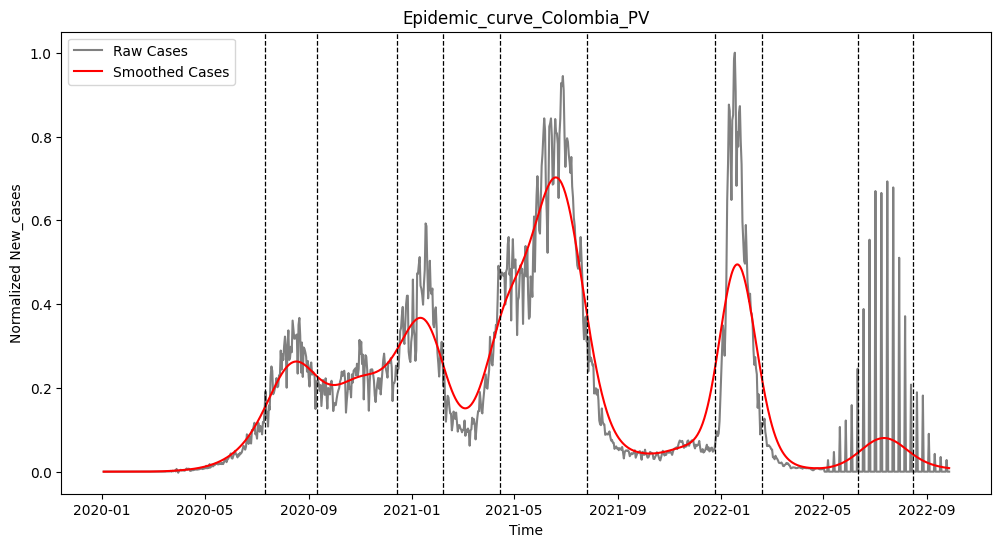

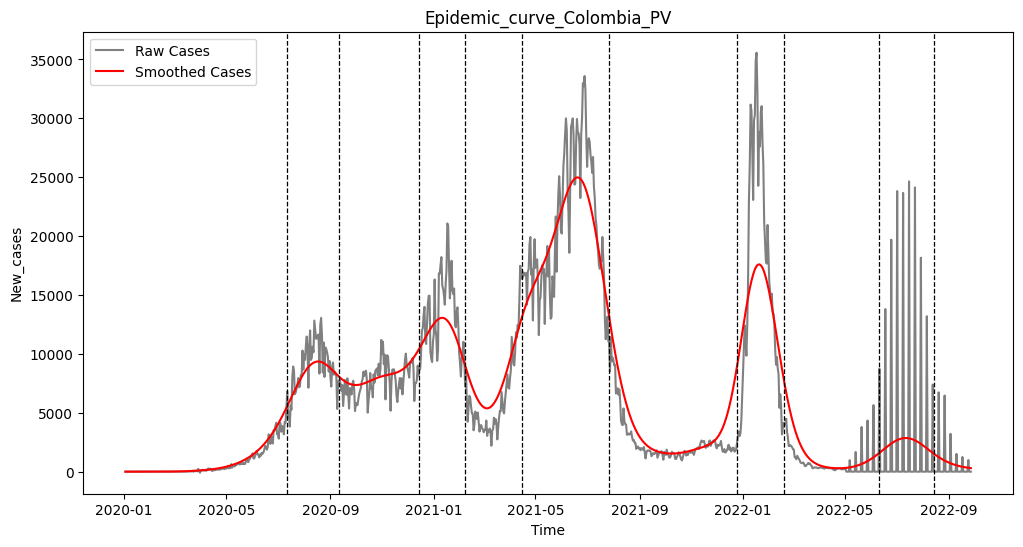

In [8]:
example = ek.peaksValleys(databaseCOLOMBIA,datesName,casesName,[configFile,"Code","CO","kernel1"],[configFile,"Code","CO","Kernel2"],plotNamePV,dfNamePV,outFolderPlot,outFolderDF,thresholdPV)
example.run()

In [ ]:
# A simplier version with a kernels as a number an without customize the attributes with default values
example = ek.peaksValleys(databaseCOLOMBIA,datesName,casesName,35,30,plotNamePV,dfNamePV)
example.run()

Using EpidemicKabu for all countries at once

    Waves

In [10]:
#We could build a function to automatize the estimation for the 15 countries 
def kabuWavesDefault(database,datesName,casesName,value,plotsName,dfName):
    test = waves(database,datesName,casesName,[configFile,"Code",value,"kernel1"],[configFile,"Code",value,"Kernel2"],plotsName,dfName)
    test.run()

#using the function with the complete database 
database.groupby("Country").apply(lambda x : kabuWavesDefault(
    x[["Date_reported","New_cases"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "Waves_"+ x["Country"].iloc[0],
    "Waves_"+ x["Country"].iloc[0]
    ))

""


    Peaks and valleys

In [ ]:
#We could build a function to automatize the estimation for the 15 countries 
def kabuPeaksValleysDefault(database,datesName,casesName,value,plotsName,dfName):
    test = peaksValleys(database,datesName,casesName,[configFile,"Code",value,"kernel1"],[configFile,"Code",value,"Kernel2"],plotsName,dfName)
    test.run()

#using the function with the complete database 
database.groupby("Country").apply(lambda x : kabuPeaksValleysDefault(
    x[["Date_reported","New_cases"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "PV_"+ x["Country"].iloc[0],
    "PV_"+ x["Country"].iloc[0]
    ))